In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("fsnau_indices_by_region_2010_2019.csv")

In [3]:
df.columns

Index(['Regions', 'Districts', 'Rainfall', 'Vegetation cover (NDVI)',
       'Price of water', 'Sorghum prices', 'Maize prices', 'Red Rice prices',
       'Local goat prices', 'Wage labor', 'TOT (goat to cereals)',
       'TOT (wage to cereals)', 'Cost of Minimum Basket (CMB)',
       'New Admissions (GAM)', 'Measles Cases', 'AWD/cholera cases',
       'AWD/Cholera deaths', 'Malaria Cases', 'Displacement (arrivals)',
       'Displacement (departures)', 'date'],
      dtype='object')

In [37]:
## Unique districts in dataset
fsnau_dist = np.unique(df.Districts)
fsnau_dist = pd.DataFrame(fsnau_dist)
fsnau_dist.columns = ['dist_names']
fsnau_dist.dist_names

0       Adan Yabaal
1           Afgooye
2           Afmadow
3        Baardheere
4         Badhaadhe
5              Baki
6            Balcad
7       Bandarbeyla
8           Baraawe
9          Baydhaba
10      Belet Weyne
11      Belet Xaawo
12          Berbera
13           Borama
14          Bossaso
15          Bu'aale
16       Bulo Burto
17            Burco
18         Burtinle
19        Buuhoodle
20      Buur Hakaba
21        Cabudwaaq
22          Cadaado
23           Cadale
24          Caluula
25          Caynabo
26      Ceel Afweyn
27       Ceel Barde
28        Ceel Buur
29       Ceel Dheer
          ...      
44        Jalalaqsi
45          Jamaame
46         Jariiban
47            Jilib
48           Jowhar
49         Kismaayo
50     Kurtunwaarey
51     Laas Caanood
52        Laasqoray
53          Lughaye
54             Luuq
55            Marka
56        Mogadishu
57         Owdweyne
58          Qandala
59    Qansax Dheere
60           Qardho
61        Qoryooley
62       Rab Dhuure


In [9]:
## Number of districts
len(fsnau_dist)

74

In [10]:
## Percentage of null values in dataset by column
df.isnull().mean().sort_values(ascending=False)*100

AWD/Cholera deaths              98.951538
AWD/cholera cases               83.480895
Measles Cases                   75.291240
Malaria Cases                   73.939888
Displacement (arrivals)         72.611836
Displacement (departures)       70.712954
New Admissions (GAM)            70.316869
Cost of Minimum Basket (CMB)    51.467847
Maize prices                    47.017707
Sorghum prices                  43.918919
Price of water                  41.484157
TOT (wage to cereals)           33.760485
TOT (goat to cereals)           32.700373
Wage labor                      28.471575
Local goat prices               27.283318
Red Rice prices                 27.085275
Rainfall                         3.052190
Vegetation cover (NDVI)          1.351351
Districts                        0.000000
date                             0.000000
Regions                          0.000000
dtype: float64

In [19]:
## Number of timestamps per district
(df[df.Districts == 'Wanla Weyn']['Vegetation cover (NDVI)']).count()

116

In [20]:
## Aggregating ndvi & rainfall by region and date
ndvi_rainfall_rgn = df.groupby(['Regions', 'date']).aggregate({'Vegetation cover (NDVI)':'sum', 'Rainfall': 'sum'})

In [21]:
ndvi_rainfall_rgn.head(10)

Vegetation cover (NDVI)  Rainfall
Regions date                                      
Awdal   2010-01                     0.46      0.00
        2010-02                     0.49    569.32
        2010-03                     0.66     54.18
        2010-04                     0.71    501.60
        2010-05                     0.67    111.58
        2010-06                     0.54     27.08
        2010-07                     0.52    132.71
        2010-08                     0.57   1103.00
        2010-09                     0.64    114.16
        2010-10                     0.60     11.79

In [12]:
## 10 occasions of most rainfall in 10 years in Somalia by region
ndvi_rainfall_rgn.nlargest(10, 'Rainfall')

Vegetation cover (NDVI)  Rainfall
Regions        date                                      
Shabelle Hoose 2013-04                     3.20    5725.0
               2010-04                     3.00    4786.0
               2012-10                     2.69    4413.0
Gedo           2011-10                     1.35    4412.0
Shabelle Hoose 2011-10                     2.09    4260.0
               2012-04                     2.39    4179.0
Bay            2011-10                     1.11    3905.0
               2013-04                     2.00    3534.0
Gedo           2013-04                     2.34    3466.0
Shabelle Hoose 2018-04                     1.84    3238.0

In [22]:
## Aggregating NDVI & Rainfall by district, region  and date
ndvi_rainfall_district_rgn = df.groupby(['Districts', 'Regions', 'date']).aggregate({'Vegetation cover (NDVI)':'sum', 'Rainfall': 'sum'})

In [23]:
## 10 occasions of most rainfall in 10 years in Somalia by district
ndvi_rainfall_district_rgn.nlargest(10, 'Rainfall')

,,,Vegetation cover (NDVI),Rainfall
Districts,Regions,date,,
Qansax Dheere,Bay,2011-10,0.25,1155.0
Diinsoor,Bay,2011-10,0.27,1126.0
Ceel Waaq,Gedo,2011-10,0.27,1111.0
Saakow,Juba Dhexe,2011-10,0.26,1063.0
Baardheere,Gedo,2011-10,0.26,1050.0
Bu'aale,Juba Dhexe,2011-10,0.36,963.0
Buur Hakaba,Bay,2013-04,0.52,948.0
Sablaale,Shabelle Hoose,2013-04,0.56,948.0
Qoryooley,Shabelle Hoose,2013-04,0.53,916.0


### Shabelle Hoose gets the most rainfall by region overall but if we evaluate by district, Shabelle hoose districts individually are at the bottom 10.

In [24]:
## Looking at the 10 districts with highest NDVI
ndvi_rainfall_district_rgn.nlargest(10, 'Vegetation cover (NDVI)')

Vegetation cover (NDVI)  Rainfall
Districts    Regions        date                                      
Sablaale     Shabelle Hoose 2011-12                     0.74    224.00
Badhaadhe    Juba Hoose     2011-12                     0.72    318.00
                            2018-06                     0.70     29.47
Bu'aale      Juba Dhexe     2011-12                     0.70    189.00
Kismaayo     Juba Hoose     2018-06                     0.70     35.37
Kurtunwaarey Shabelle Hoose 2018-07                     0.70     36.30
Badhaadhe    Juba Hoose     2015-12                     0.69     74.63
Kismaayo     Juba Hoose     2011-12                     0.69    273.00
Kurtunwaarey Shabelle Hoose 2011-12                     0.69    196.00
Afmadow      Juba Hoose     2011-12                     0.68    199.00

### The districts with the most NDVI are within Shabelle Hoose and Juba Dhexe. Notice that these also have the good amount of rainfall. Natural to assume a correlation

In [25]:
## Computing normalized rainfall index (between 0 to 1) for consistent measurement in time series comparison
ndvi_rainfall_district_rgn['Norm_Rainfall'] = ndvi_rainfall_district_rgn['Rainfall'] / max(ndvi_rainfall_district_rgn['Rainfall'])

In [26]:
ndvi_rainfall_district_rgn.nlargest(10, 'Norm_Rainfall')

,,,Vegetation cover (NDVI),Rainfall,Norm_Rainfall
Districts,Regions,date,,,
Qansax Dheere,Bay,2011-10,0.25,1155.0,1.000000
Diinsoor,Bay,2011-10,0.27,1126.0,0.974892
Ceel Waaq,Gedo,2011-10,0.27,1111.0,0.961905
Saakow,Juba Dhexe,2011-10,0.26,1063.0,0.920346
Baardheere,Gedo,2011-10,0.26,1050.0,0.909091
Bu'aale,Juba Dhexe,2011-10,0.36,963.0,0.833766
Buur Hakaba,Bay,2013-04,0.52,948.0,0.820779
Sablaale,Shabelle Hoose,2013-04,0.56,948.0,0.820779
Qoryooley,Shabelle Hoose,2013-04,0.53,916.0,0.793074


In [28]:
## Removing multiindex
df_rain = ndvi_rainfall_district_rgn.reset_index()

In [29]:
## And setting 'date' as index and looking at Normalized rainfall by district columns
norm_rain = df_rain.pivot(index='date', columns='Districts', values='Norm_Rainfall')

In [30]:
norm_rain.head()

Districts,Adan Yabaal,Afgooye,Afmadow,Baardheere,Badhaadhe,Baki,Balcad,Bandarbeyla,Baraawe,Baydhaba,...,Sablaale,Sheikh,Taleex,Tayeeglow,Waajid,Wanla Weyn,Xarardheere,Xudun,Xudur,Zeylac
date,,,,,,,,,,,,,,,,,,,,,
2010-01,0.000000,0.000000,0.000069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02,0.000000,0.001022,0.002727,0.004935,0.005983,0.114286,0.000294,0.000000,0.000035,0.027784,...,0.001602,0.008381,0.002926,0.014537,0.017818,0.011853,0.000000,0.000303,0.008814,0.103896
2010-03,0.037593,0.048909,0.218182,0.225974,0.251082,0.007186,0.041749,0.015792,0.028216,0.134199,...,0.086580,0.045238,0.015775,0.062303,0.156710,0.075775,0.006190,0.025299,0.099567,0.003740
2010-04,0.275325,0.560173,0.503896,0.413853,0.452814,0.173160,0.527273,0.129004,0.556710,0.435498,...,0.612121,0.315152,0.116883,0.313420,0.282251,0.554978,0.202597,0.118615,0.202597,0.026338
2010-05,0.068390,0.161039,0.186147,0.089177,0.238095,0.043013,0.132468,0.148918,0.159307,0.061550,...,0.237229,0.183550,0.184416,0.088312,0.037991,0.109957,0.091775,0.178355,0.055879,0.009957


In [ ]:
## using geopy to extract latitude  / longitude data
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="rain")
def extract_coords(place):
    if place:
        if place == 'Baydhaba':
            place = 'Baydhabo'
        location = geolocator.geocode(place + ", Somalia")
        print(place, location)
        if place not in dist_coords:
            if place == 'Baydhabo':
                place = 'Baydhaba'
            dist_coords[place] = (location.latitude, location.longitude)
    return
dist_coords = {}
fsnau_dist.dist_names.apply(extract_coords)

In [61]:
location = geolocator.geocode("Baydhabo, Somalia")
print(location.address)
print((location.latitude, location.longitude))

Baydhabo, Baidoa بيدوا, Bay باي, DC5 2WT, Soomaaliya الصومال
(3.1171806, 43.6555618149814)


In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from datetime import timedelta  

### Somalian geodata

In [41]:
dfg = gpd.read_file("geodata_somalia/som_admbnda_adm2_undp.shp")
dfg = dfg.sort_values(by='admin2Name')

dfg = dfg[['admin2Name','admin1Name','admin0Name', 'Shape_Area','geometry']]

dfg.loc[dfg[dfg['admin2Name'] == 'Baydhaba'].index,'admin2Name'] = 'Baidoa'
dfg.loc[dfg[dfg['admin2Name'] == 'Kismaayo'].index,'admin2Name'] = 'Kismayo'

# dfg['regdis'] = dfg['admin1Name'] + ' - ' + dfg['admin2Name'] 

# dfg = dfg[['regdis','geometry','Shape_Area']]
np.unique(dfg['admin2Name']) == sorted(dist_coords)

/home/prasanna/software/miniconda3/envs/tdi/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


False

In [42]:
norm_rain.head()

Districts,Adan Yabaal,Afgooye,Afmadow,Baardheere,Badhaadhe,Baki,Balcad,Bandarbeyla,Baraawe,Baydhaba,...,Sablaale,Sheikh,Taleex,Tayeeglow,Waajid,Wanla Weyn,Xarardheere,Xudun,Xudur,Zeylac
date,,,,,,,,,,,,,,,,,,,,,
2010-01,0.000000,0.000000,0.000069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02,0.000000,0.001022,0.002727,0.004935,0.005983,0.114286,0.000294,0.000000,0.000035,0.027784,...,0.001602,0.008381,0.002926,0.014537,0.017818,0.011853,0.000000,0.000303,0.008814,0.103896
2010-03,0.037593,0.048909,0.218182,0.225974,0.251082,0.007186,0.041749,0.015792,0.028216,0.134199,...,0.086580,0.045238,0.015775,0.062303,0.156710,0.075775,0.006190,0.025299,0.099567,0.003740
2010-04,0.275325,0.560173,0.503896,0.413853,0.452814,0.173160,0.527273,0.129004,0.556710,0.435498,...,0.612121,0.315152,0.116883,0.313420,0.282251,0.554978,0.202597,0.118615,0.202597,0.026338
2010-05,0.068390,0.161039,0.186147,0.089177,0.238095,0.043013,0.132468,0.148918,0.159307,0.061550,...,0.237229,0.183550,0.184416,0.088312,0.037991,0.109957,0.091775,0.178355,0.055879,0.009957


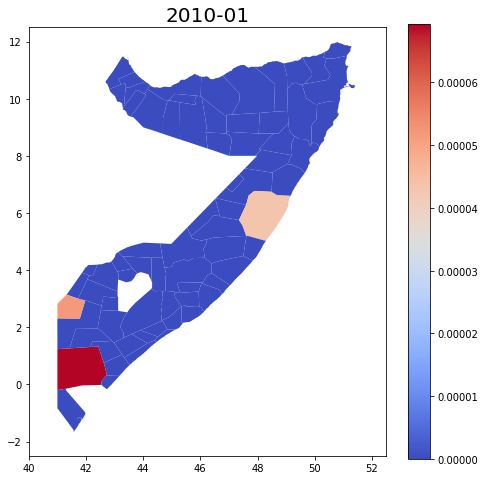

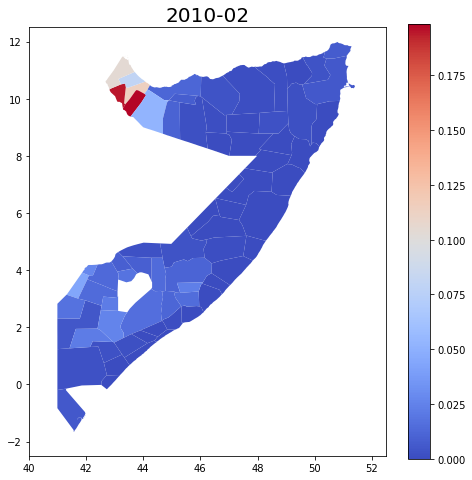

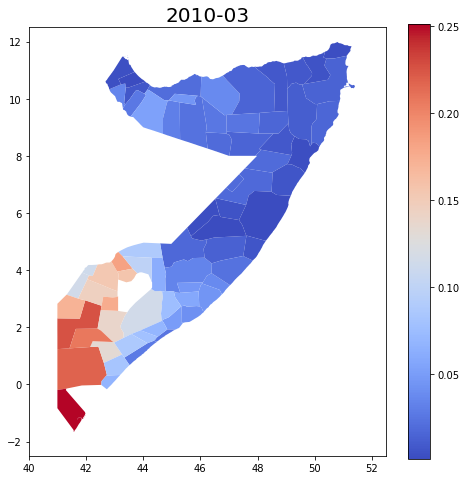

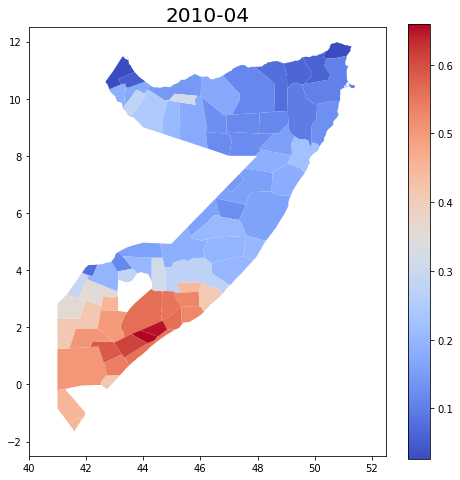

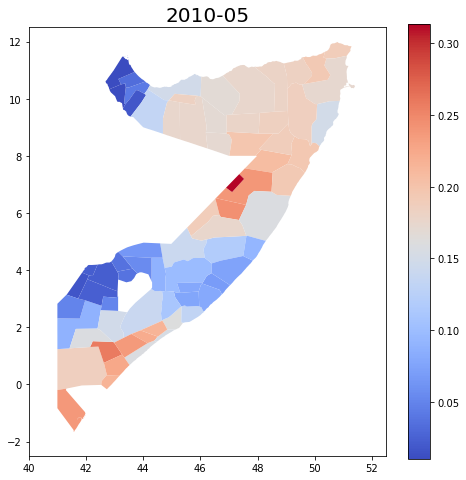

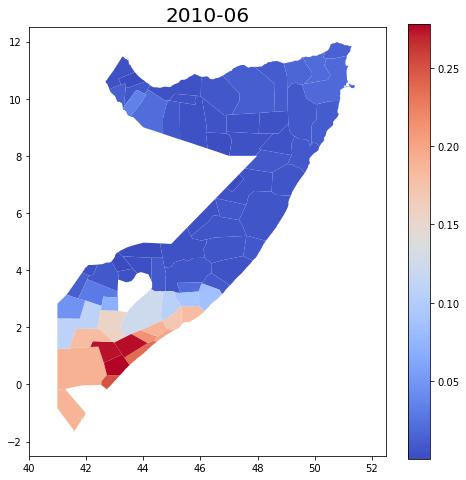

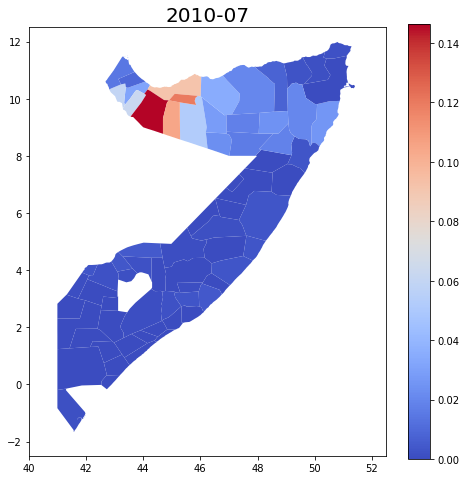

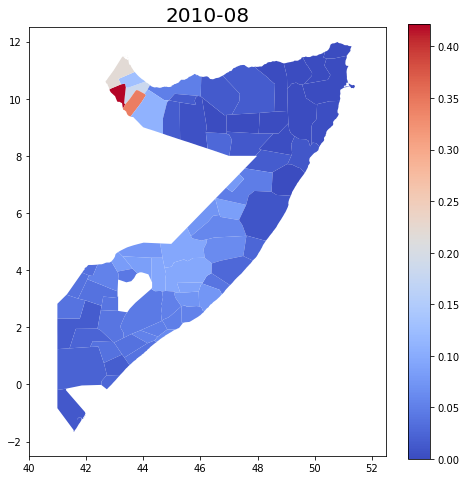

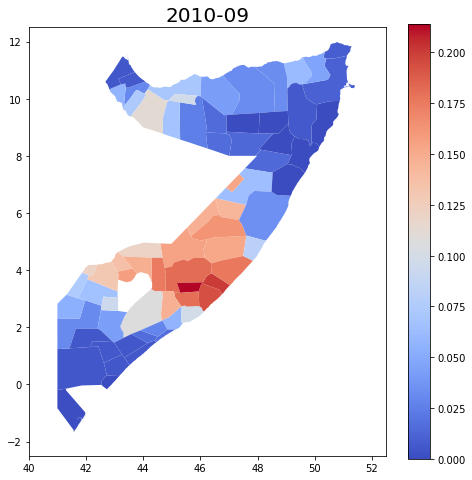

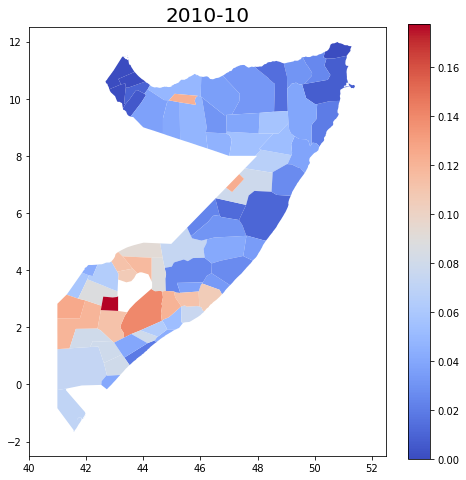

In [43]:
## Visualizing rainfall indices on map
for ind in range(0,10):
    tsi = norm_rain.index[ind]

    x = pd.DataFrame(norm_rain.loc[tsi,:].reset_index())
    x.columns=['admin2Name','Norm_Rainfall']

    # Plot settings
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'aspect':'equal'})
    ax.set_xlim(40, 52.5)
    ax.set_ylim(-2.5,12.5)
    #ax.set_axis_off()
    imtitle = str(tsi)
    ax.set_title(imtitle, size = 20)
    cmap = plt.cm.get_cmap('coolwarm')
    colors = cmap(np.arange(cmap.N))

    # Plot satellite data on top of natural earth
    dfg.merge(x).plot(ax=ax, column='Norm_Rainfall', cmap=cmap, legend=True);
    dpath = {}
    dpath['home'] = './data/conflicts'
    dpath['subfolder'] = 'images/district_weekly'
    dpath['filename'] = imtitle

    fig.savefig(os.path.join(dpath['home'],dpath['subfolder'],dpath['filename']))

In [44]:
def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(1, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax.imshow([colors], extent=[0, 10, 0, 1])

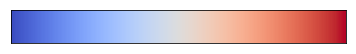

In [45]:
view_colormap('coolwarm')

In [50]:
ndvi = df_rain.pivot(index='date', columns='Districts', values='Vegetation cover (NDVI)')

In [51]:
ndvi.head()

Districts,Adan Yabaal,Afgooye,Afmadow,Baardheere,Badhaadhe,Baki,Balcad,Bandarbeyla,Baraawe,Baydhaba,...,Sablaale,Sheikh,Taleex,Tayeeglow,Waajid,Wanla Weyn,Xarardheere,Xudun,Xudur,Zeylac
date,,,,,,,,,,,,,,,,,,,,,
2010-01,0.29,0.32,0.40,0.32,0.51,0.13,0.35,0.13,0.40,0.38,...,0.55,0.18,0.13,0.29,0.25,0.27,0.18,0.13,0.24,0.09
2010-02,0.23,0.26,0.32,0.27,0.43,0.14,0.28,0.13,0.31,0.30,...,0.41,0.18,0.13,0.25,0.23,0.22,0.16,0.13,0.22,0.10
2010-03,0.23,0.25,0.35,0.33,0.45,0.19,0.26,0.13,0.29,0.38,...,0.42,0.22,0.14,0.29,0.31,0.23,0.16,0.14,0.26,0.13
2010-04,0.29,0.35,0.47,0.45,0.56,0.20,0.33,0.14,0.39,0.51,...,0.58,0.24,0.15,0.42,0.42,0.32,0.19,0.17,0.34,0.13
2010-05,0.35,0.46,0.50,0.42,0.66,0.18,0.43,0.15,0.54,0.53,...,0.68,0.26,0.17,0.47,0.40,0.42,0.25,0.20,0.38,0.12


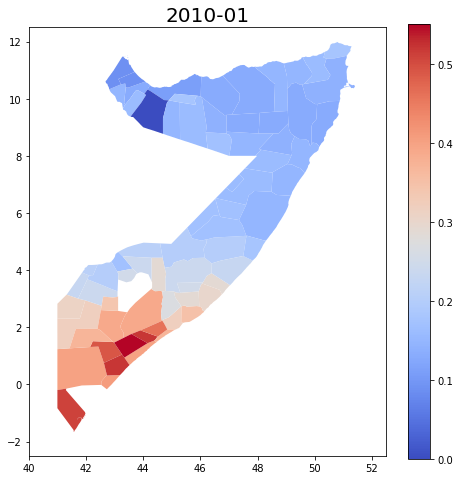

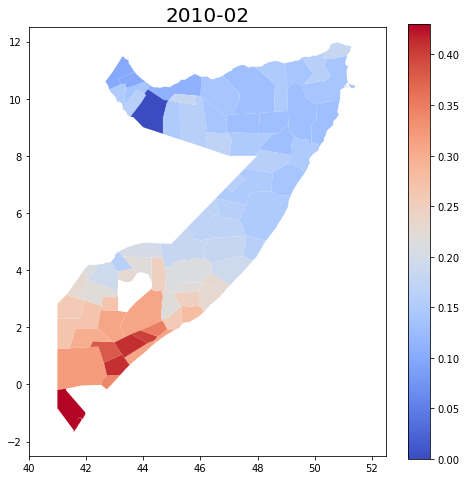

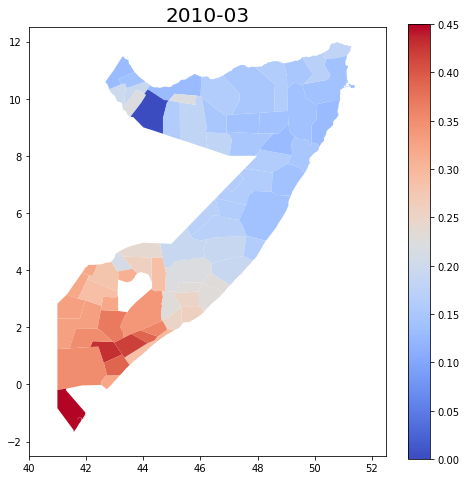

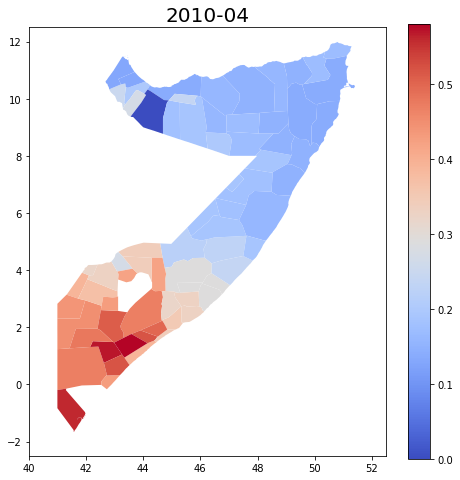

In [52]:
## Visualizing NDVI on map
for ind in range(0,4):
    tsi = norm_ndvi.index[ind]

    x = pd.DataFrame(ndvi.loc[tsi,:].reset_index())
    x.columns=['admin2Name','NDVI']

    # Plot settings
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'aspect':'equal'})
    ax.set_xlim(40, 52.5)
    ax.set_ylim(-2.5,12.5)
    #ax.set_axis_off()
    imtitle = str(tsi)
    ax.set_title(imtitle, size = 20)
    cmap = plt.cm.get_cmap('coolwarm')
    colors = cmap(np.arange(cmap.N))

    # Plot satellite data on top of natural earth
    dfg.merge(x).plot(ax=ax, column='NDVI', cmap=cmap, legend=True);
    dpath = {}
    dpath['home'] = './data/conflicts'
    dpath['subfolder'] = 'images/district_weekly'
    dpath['filename'] = imtitle

    fig.savefig(os.path.join(dpath['home'],dpath['subfolder'],dpath['filename']))

In [53]:
norm_rain.to_csv("normalized_rainfall_fsnau_district.csv", sep='\t',index=False)
ndvi.to_csv("ndvi_fsnau_district.csv", sep='\t',index=False)